In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [79]:
iris = load_iris(as_frame=True)

In [80]:
data = iris['data']
data.drop(['sepal length (cm)', 'sepal width (cm)'], axis = 'columns', inplace= True)
data

C:\Users\juane\AppData\Local\Temp\ipykernel_2120\3415451802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['sepal length (cm)', 'sepal width (cm)'], axis = 'columns', inplace= True)


,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [81]:
data['petal length (cm)']

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal length (cm), Length: 150, dtype: float64

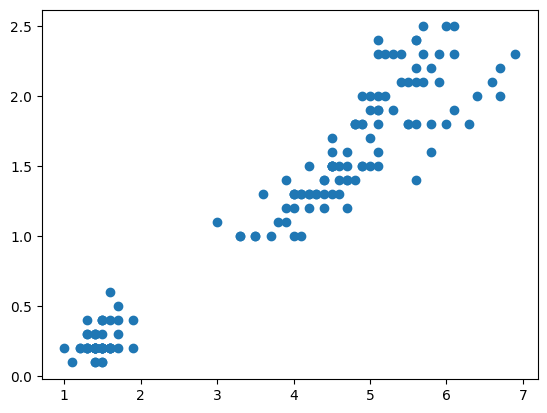

In [82]:
plt.scatter(data['petal length (cm)'], data['petal width (cm)'])

In [83]:
km = KMeans(n_clusters = 2)


In [84]:
y_predicted = km.fit_predict(data[['petal length (cm)', 'petal width (cm)']])
data['cluster'] = y_predicted

c:\Users\juane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\juane\AppData\Local\Temp\ipykernel_2120\684656848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = y_predicted


In [85]:
data

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


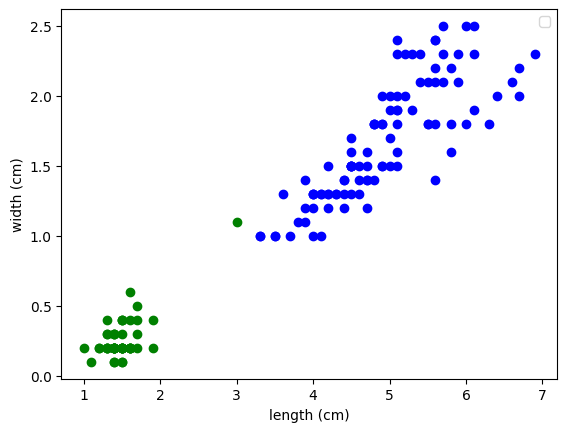

In [86]:
data1 = data[data['cluster'] == 0]
data2 = data[data['cluster'] == 1]
plt.scatter(data1['petal length (cm)'], data1['petal width (cm)'], color = 'green')
plt.scatter(data2['petal length (cm)'], data2['petal width (cm)'], color = 'blue')
plt.xlabel ('length (cm)')
plt.ylabel('width (cm)')
plt.legend()

#Almost perfect clustering, however it gets one point wrong.


In [92]:
#I am going to try to fix it scaling the variables.
#First scale petal length
scaler = MinMaxScaler()
scaler.fit(data[['petal length (cm)']])
data['petal length (cm)'] = scaler.transform(data[['petal length (cm)']])

C:\Users\juane\AppData\Local\Temp\ipykernel_2120\3521743624.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['petal length (cm)'] = scaler.transform(data[['petal length (cm)']])


,petal length (cm),petal width (cm),cluster
0,0.067797,0.2,0
1,0.067797,0.2,0
2,0.050847,0.2,0
3,0.084746,0.2,0
4,0.067797,0.2,0
...,...,...,...
145,0.711864,2.3,1
146,0.677966,1.9,1
147,0.711864,2.0,1
148,0.745763,2.3,1


In [95]:
# Then rescale petal width
scaler.fit(data[['petal width (cm)']])
data['petal width (cm)'] = scaler.transform(data[['petal width (cm)']])
data

C:\Users\juane\AppData\Local\Temp\ipykernel_2120\412377910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['petal width (cm)'] = scaler.transform(data[['petal width (cm)']])


,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


In [97]:
km = KMeans(n_clusters = 2)

y_predicted = km.fit_predict(data[['petal length (cm)', 'petal width (cm)']])
y_predicted


c:\Users\juane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [101]:
data_scaled = data.drop(['cluster'], axis = 'columns')
data_scaled['clusters'] = y_predicted
data_scaled

,petal length (cm),petal width (cm),clusters
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


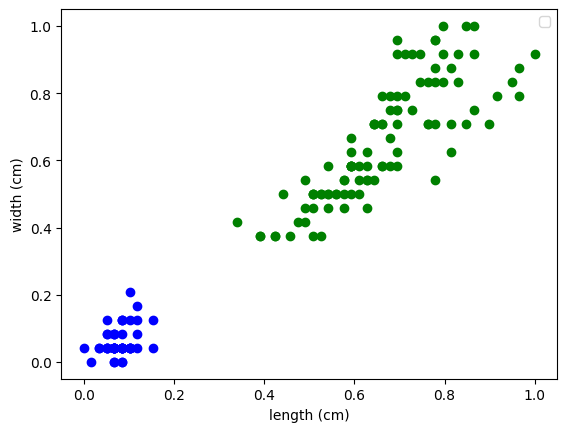

In [105]:
data_scaled1 = data_scaled[data_scaled['clusters'] == 0]
data_scaled2 = data_scaled[data_scaled['clusters'] == 1]
plt.scatter(data_scaled1['petal length (cm)'], data_scaled1['petal width (cm)'], color = 'green')
plt.scatter(data_scaled2['petal length (cm)'], data_scaled2['petal width (cm)'], color = 'blue')
plt.xlabel ('length (cm)')
plt.ylabel('width (cm)')
plt.legend()

# We now see that after rescaling the data we got a more accurate description of the clusters. 

In [108]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

c:\Users\juane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\juane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\juane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\juane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

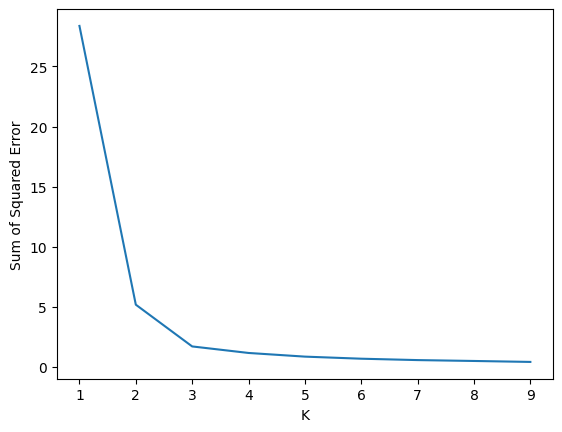

In [110]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)

# The optimal number of clusters according to the elbow rule is n = 3. I did the exercise with n = 2. I will now redo it with n = 3

In [116]:
km = KMeans(n_clusters = 3)

y_predicted = km.fit_predict(data_scaled[['petal length (cm)', 'petal width (cm)']])
y_predicted

c:\Users\juane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [117]:
data_scaled['clusters'] = y_predicted
data_scaled

,petal length (cm),petal width (cm),clusters
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


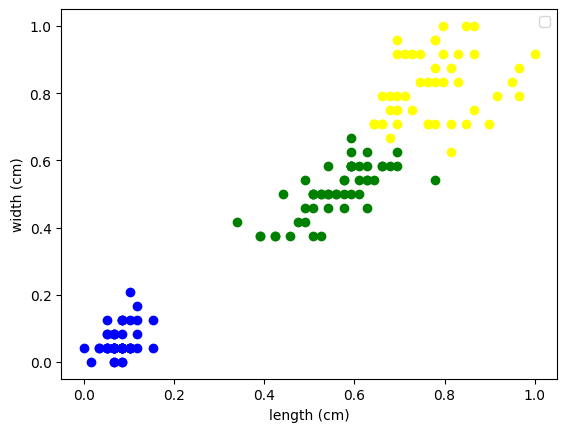

In [119]:
data_scaled1 = data_scaled[data_scaled['clusters'] == 0]
data_scaled2 = data_scaled[data_scaled['clusters'] == 1]
data_scaled3 = data_scaled[data_scaled['clusters'] == 2]
plt.scatter(data_scaled1['petal length (cm)'], data_scaled1['petal width (cm)'], color = 'green')
plt.scatter(data_scaled2['petal length (cm)'], data_scaled2['petal width (cm)'], color = 'blue')
plt.scatter(data_scaled3['petal length (cm)'], data_scaled3['petal width (cm)'], color = 'yellow')
plt.xlabel ('length (cm)')
plt.ylabel('width (cm)')
plt.legend()


#Now the top cluster got divided in two different ones. Which seems much more reasonable



In [122]:
iris.target.unique()
# According to the data, we should have 3 possible types of flowers, so getting 3 clusters is correct.

array([0, 1, 2])